In [11]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

stock_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price                     Adj Close     Close      High       Low      Open  \
Ticker                         AAPL      AAPL      AAPL      AAPL      AAPL   
Date                                                                          
2010-01-04 00:00:00+00:00  6.447412  7.643214  7.660714  7.585000  7.622500   
2010-01-05 00:00:00+00:00  6.458560  7.656429  7.699643  7.616071  7.664286   
2010-01-06 00:00:00+00:00  6.355827  7.534643  7.686786  7.526786  7.656429   
2010-01-07 00:00:00+00:00  6.344077  7.520714  7.571429  7.466071  7.562500   
2010-01-08 00:00:00+00:00  6.386256  7.570714  7.571429  7.466429  7.510714   

Price                         Volume  
Ticker                          AAPL  
Date                                  
2010-01-04 00:00:00+00:00  493729600  
2010-01-05 00:00:00+00:00  601904800  
2010-01-06 00:00:00+00:00  552160000  
2010-01-07 00:00:00+00:00  477131200  
2010-01-08 00:00:00+00:00  447610800  


In [4]:
#pip install yfinance

Note: you may need to restart the kernel to use updated packages.


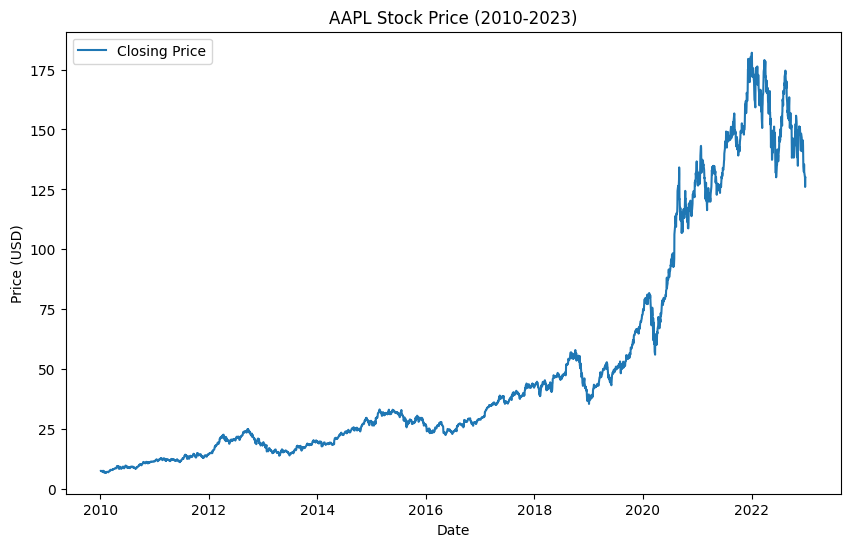

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Closing Price')
plt.title('AAPL Stock Price (2010-2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [13]:
stock_data['Prev Close'] = stock_data['Close'].shift(1)

# Drop the first row as it has NaN for 'Prev Close'
stock_data.dropna(inplace=True)

# Use 'Prev Close' to predict 'Close'
X = stock_data[['Prev Close']]  # Feature: Previous day's closing price
y = stock_data['Close']        # Target: Today's closing price

# Split data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(stock_data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 2.1313983008000914
Root Mean Squared Error: 2.8443659571741784


C:\Users\SOMESH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


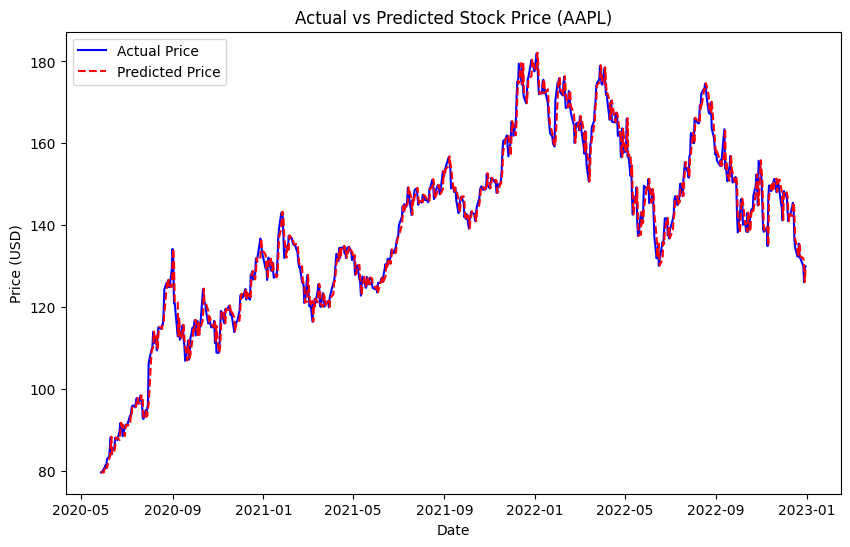

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Price (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()